# 1. Static Data Preparation
Inputs and Responses:
The inputs list contains example user queries.
The responses list contains corresponding responses from the chatbot.
2. Preprocessing
Tokenization:

Function tokenize_text: This function tokenizes (splits) the input text into individual words and converts it to lowercase for consistency.
The inputs and responses are tokenized into lists of words.
Tokenizers:

Tokenizer for Inputs and Responses: Two separate Tokenizer instances are created for the input and response texts.
The tokenizers are fitted on the tokenized text data, creating mappings from words to integers for both inputs and responses.
Sequences:

Conversion to Sequences: The tokenized texts are converted into sequences of integers, where each integer represents a word.
Padding:

Padding Sequences: Sequences are padded to ensure they all have the same length. This is necessary because machine learning models typically require inputs of a uniform shape.
max_input_length and max_response_length are determined based on the longest sequences in the dataset.
3. Model Definition
Encoder:

Input Layer: Takes the padded input sequences.
Embedding Layer: Converts integer sequences into dense vectors of fixed size (embeddings).
LSTM Layer: Processes the embedded sequences and generates output sequences along with hidden states (encoder_state_h and encoder_state_c).
Decoder:

Input Layer: Takes the padded response sequences.
Embedding Layer: Similar to the encoder, converts integer sequences into dense vectors.
LSTM Layer: Uses the encoder’s hidden states as initial states to generate sequences of output.
Dense Layer: Produces probability distributions over the vocabulary for the next word in the sequence.
Model:

Combines Encoder and Decoder: The model is built by combining the encoder and decoder components.
Compilation: The model is compiled using the Adam optimizer and categorical crossentropy loss function. Accuracy is used as the evaluation metric.
4. Training
Training Data Preparation:

X_train contains the input sequences.
y_train contains the one-hot encoded response sequences (i.e., each word is represented as a binary vector).
Model Training:

The model is trained with the prepared data for a specified number of epochs. During training, the model learns to predict the next word in the sequence based on the input and previous words.
Saving the Model:

The trained model is saved to a file (chatbot_seq2seq_model.h5) for later use.
5. Response Generation
Function generate_response:
Input Preprocessing: The user’s input is tokenized and converted into a sequence, and then padded to match the input length expected by the model.
Decoder Initialization: Starts with a sequence of zeros for the decoder input.
Generating Response: Iteratively predicts the next word using the model and appends it to the response. The decoder input is updated with the predicted word for each step.
Stopping Criteria: The generation stops if the predicted word is an empty string or if a special <end> token is encountered.
6. Example Usage
Testing the Model:
The generate_response function is tested with a sample user input ('Tell me a joke'), and the generated response is printed.
    
Summary
Data Preparation: Tokenize and convert text data into numerical sequences.
Model Definition: Build a Seq2Seq model with embedding, LSTM, and Dense layers.
Training: Train the model on the prepared data and save it.
Response Generation: Generate responses based on user input using the trained model.

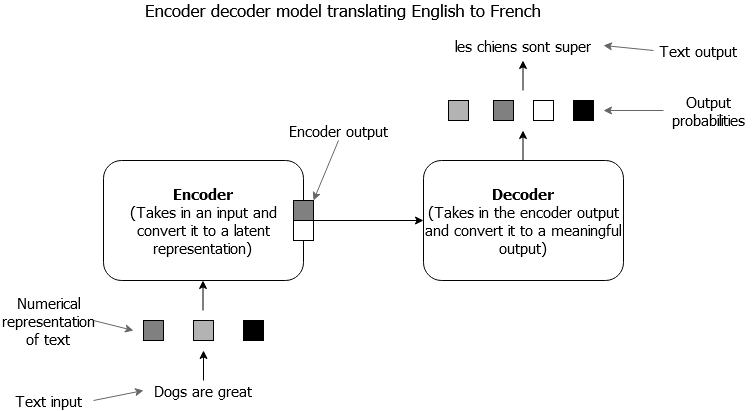

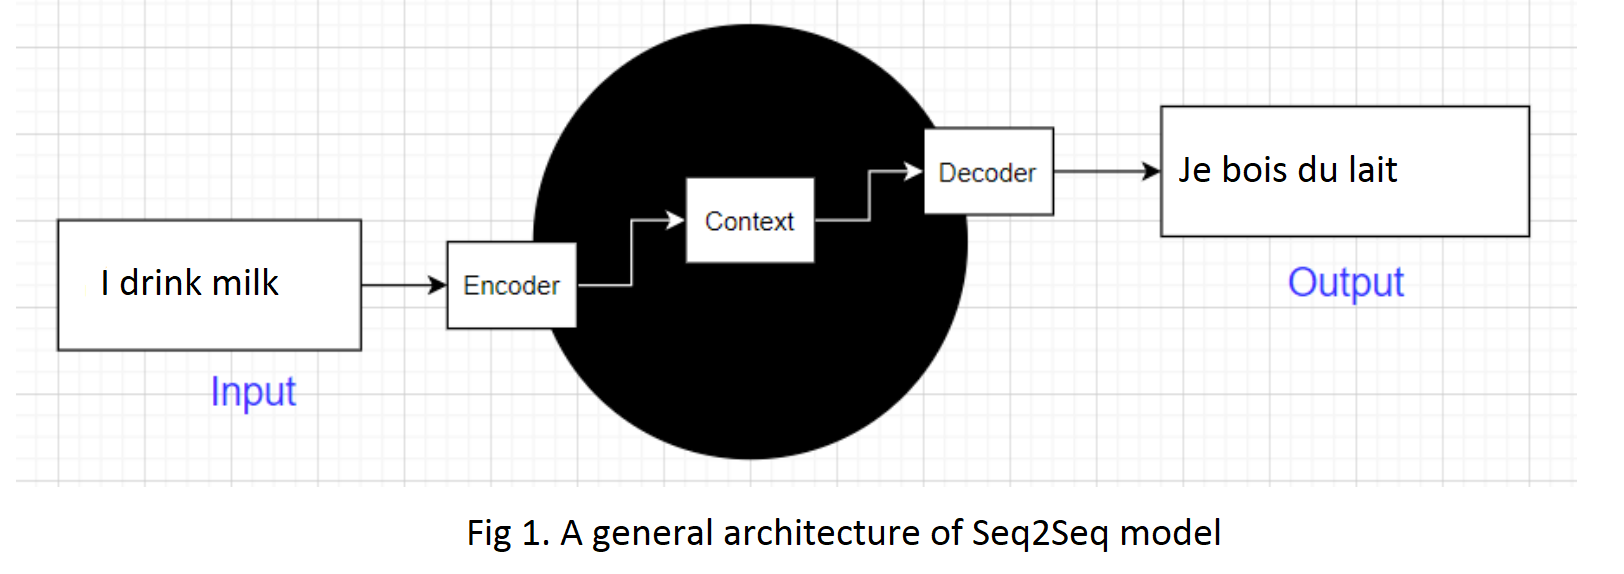

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [ ]:
import numpy as np
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense
from keras.utils import to_categorical

nltk.download('punkt')

# Static data for chatbot
inputs = [
    'Hello',
    'How are you?',
    'What is your name?',
    'Tell me a joke',
    'Goodbye'
]

responses = [
    'Hi there!',
    'I am doing well, thank you!',
    'I am a chatbot created to assist you.',
    'Why did the scarecrow win an award? Because he was outstanding in his field!',
    'Goodbye! Have a great day!'
]

# Tokenize and preprocess
def tokenize_text(text):
    """Tokenizes and lowercases the input text."""
    return nltk.word_tokenize(text.lower())

input_tokens = [tokenize_text(text) for text in inputs]
response_tokens = [tokenize_text(text) for text in responses]

# Create and fit tokenizers
input_tokenizer = Tokenizer()
response_tokenizer = Tokenizer()

input_tokenizer.fit_on_texts(input_tokens)
response_tokenizer.fit_on_texts(response_tokens)

# Convert texts to sequences
input_sequences = input_tokenizer.texts_to_sequences(input_tokens)
response_sequences = response_tokenizer.texts_to_sequences(response_tokens)

# Padding sequences
max_input_length = max(len(seq) for seq in input_sequences)
max_response_length = max(len(seq) for seq in response_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_input_length, padding='post')
response_sequences = pad_sequences(response_sequences, maxlen=max_response_length, padding='post')

# Prepare training data
X_train = input_sequences
y_train = pad_sequences(response_sequences, maxlen=max_response_length, padding='post')
y_train = to_categorical(sponse_tokenizer.wy_train, num_classes=len(reord_index) + 1)

# Define Seq2Seq model with attention
embedding_dim = 50
hidden_units = 256

# Encoder
encoder_inputs = Input(shape=(max_input_length,))
x = Embedding(input_dim=len(input_tokenizer.word_index) + 1, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(x)
encoder_states = [encoder_state_h, encoder_state_c]

# Decoder
decoder_inputs = Input(shape=(max_response_length,))
x = Embedding(input_dim=len(response_tokenizer.word_index) + 1, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(x, initial_state=encoder_states)
decoder_dense = Dense(len(response_tokenizer.word_index) + 1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit([X_train, y_train], y_train, batch_size=64, epochs=10, validation_split=0.2)

# Save model
model.save('chatbot_seq2seq_model.h5')

# Function to generate a response
def generate_response(user_input):
    """Generates a response to the user input using the trained model."""
    # Preprocess user input
    input_seq = input_tokenizer.texts_to_sequences([tokenize_text(user_input)])
    input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')
    
    # Initialize decoder input sequence
    decoder_input_seq = np.zeros((1, max_response_length))
    response = ''
    
    for _ in range(max_response_length):
        # Predict next token
        output_tokens = model.predict([input_seq, decoder_input_seq])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = response_tokenizer.index_word.get(sampled_token_index, '')
        
        if sampled_word == '':
            break
        response += ' ' + sampled_word
        decoder_input_seq[0, _] = sampled_token_index
        
        if sampled_word == '<end>':  # Assuming <end> token is used
            break
    
    return response.strip()

# Example usage
user_input = 'Tell me a joke'
response = generate_response(user_input)
print(f'User: {user_input}')
print(f'Chatbot: {response}')